In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/benkupernk/Documents/GitHub/ML2 Final/ALL_PFAS_CHEMICALS.csv')
print(df.columns)

Index(['Regional Board', 'Public Water System Name', 'Site Name', 'Global ID',
       'Location ID', 'Sample ID', 'Matrix', 'Chemical Name',
       'Chemical Abbreviation', 'Qualifier', 'Value', 'Reporting Limit',
       'Detection Limit', 'Analytical Method Code', 'Lab Notes', 'QRAA',
       'Units', 'Date', 'Treated Drinking Water Sample ID',
       'Treated Drinking Water Qualifier', 'Treated Drinking Water Value',
       'Treated Drinking Water Reporting Limit',
       'Treated Drinking Water Units', 'Treated Drinking Water Date',
       'Field Pt Class', 'Site Use', 'Site Type', 'Facility Type', 'Status',
       'Address', 'City', 'Latitude', 'Longitude'],
      dtype='object')


In [3]:
df.Units.unique()

array(['NG/L', 'UG/KG', 'NG/KG', 'UG/M3'], dtype=object)

In [4]:
df.Matrix.unique()

array(['Liquid', 'Solid', 'Gas'], dtype=object)

In [5]:
df.head(2)

,Regional Board,Public Water System Name,Site Name,Global ID,Location ID,Sample ID,Matrix,Chemical Name,Chemical Abbreviation,Qualifier,...,Treated Drinking Water Date,Field Pt Class,Site Use,Site Type,Facility Type,Status,Address,City,Latitude,Longitude
0,LAHONTAN RWQCB (REGION 6T),"TRUCKEE-DONNER PUD, MAIN",Tahoe Truckee Sanitation Agency,WDR100034937,EFFLUENT,Final Effluent,Liquid,11-Chloroeicosafluoro-3-oxaundecane-1-sulfonic...,11ClPF3OUDS,ND,...,NaN,ES,Wastewater Treatment Plants,WDR Site,NaN,Active - WDR,13720 Butterfield Drive,Truckee,39.339044,-120.127773
1,SAN FRANCISCO BAY RWQCB (REGION 2),SAN JOSE WATER,San Jose Intl Airport,T10000012766,L4-3,L4-3-10,Solid,"6:2 Fluorotelomer sulfonic acid (1H,1H,2H,2H-P...",6:2FTS,ND,...,NaN,BH,Airport,Cleanup Program Site,NaN,Open - Site Assessment,1701 Airport Blvd,San Jose,37.359332,-121.931214


In [6]:
def get_val(row):
    val = row['Value']
    if val == 0:
        val = row['Detection Limit']
    return val

# replace all 0 values with the detection limit
df.Value = df.apply(lambda row: get_val(row), axis = 1)

df = df[df.Matrix == 'Solid']
df = df[df.Value > df.Value.quantile(.5)]

# drop any duplacate results
df = df.drop_duplicates(subset = ['Site Name',  'Date', 'Units', 'Sample ID', 'Location ID', 'Chemical Abbreviation'])

# piviot the data from long to wide format
idx_columns = ['Site Name', 'Site Use', 'Date', 'Units', 'Sample ID', 'Location ID',  'Latitude', 'Longitude']
len_idx = len(idx_columns)
dfp = df.pivot(index = idx_columns, columns='Chemical Abbreviation', values=['Value'])
dfp = dfp.reset_index(level = ['Site Name', 'Site Use', 'Date', 'Units', 'Sample ID', 'Location ID', 'Latitude', 'Longitude'])
dfp.columns = list(dfp.columns.get_level_values(0)[:len_idx ]) + list(dfp.columns.get_level_values(1)[len_idx :])
dfp

,Site Name,Site Use,Date,Units,Sample ID,Location ID,Latitude,Longitude,10:2FTS,11ClPF3OUDS,...,PFNS,PFOA,PFODA,PFOS,PFOSA,PFPA,PFPES,PFTEDA,PFTRIDA,PFUNDCA
0,4-S Ranch WRF,Wastewater Treatment Plants,03/03/2021,UG/KG,BFP Cake,BFP CAKE,33.014402,-117.112003,16.0,6.300,...,17.0,6.600,9.4,18.00,21.000,6.500,13.000,21.000,7.200,6.500
1,4-S Ranch WRF,Wastewater Treatment Plants,11/10/2020,UG/KG,BFP Cake,BFP CAKE,33.014402,-117.112003,10.0,4.000,...,11.0,4.300,6.1,11.00,14.000,4.200,8.200,13.000,4.600,4.200
2,A.K. Warren Water Resource Facility,Wastewater Treatment Plants,01/06/2021,UG/KG,21010600414,JW_BS_CAKE,33.805270,-118.280636,NaN,0.996,...,NaN,0.598,NaN,14.00,1.490,0.498,0.996,0.498,0.498,0.498
3,A.K. Warren Water Resource Facility,Wastewater Treatment Plants,04/07/2021,UG/KG,21040700441,JW_BS_CAKE,33.805270,-118.280636,NaN,2.950,...,NaN,0.983,NaN,14.70,0.983,0.983,0.983,1.970,1.970,0.983
4,A.K. Warren Water Resource Facility,Wastewater Treatment Plants,07/06/2021,UG/KG,21070600411,JW_BS_CAKE,33.805270,-118.280636,NaN,2.950,...,NaN,1.170,NaN,6.56,0.984,0.984,0.984,1.970,1.970,0.984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,Yreka City WWTP,Wastewater Treatment Plants,10/20/2021,UG/KG,21J0884-01 Biosolids,BIOSOLIDS,41.744100,-122.630730,17.0,6.800,...,18.0,7.200,10.0,19.00,23.000,10.000,14.000,22.000,7.700,7.000
4678,Yuba City WWTF,Wastewater Treatment Plants,03/18/2021,UG/KG,202103190266,BIO-001,39.108603,-121.612298,NaN,1.900,...,NaN,1.900,NaN,4.00,1.900,1.900,9.600,1.900,1.900,1.900
4679,Yuba City WWTF,Wastewater Treatment Plants,05/18/2021,UG/KG,202105190414,BIO-001,39.108603,-121.612298,NaN,1.700,...,NaN,1.700,NaN,3.30,1.700,1.700,8.500,1.700,1.700,1.700
4680,Yuba City WWTF,Wastewater Treatment Plants,08/25/2021,UG/KG,202108260557,BIO-001,39.108603,-121.612298,NaN,0.630,...,NaN,0.730,NaN,3.30,0.720,0.630,0.630,0.630,0.630,0.630


In [7]:
drop_list =[]
drop_limit = dfp.shape[0] * .25
for col in dfp.columns[len_idx:]:
    count = dfp[col].notna().sum()
    if count < drop_limit:
        drop_list.append(col)
dfp_clean = dfp.drop(columns = drop_list)
dfp_clean = dfp_clean.dropna(subset = dfp_clean.columns[len_idx:], how = 'any').reset_index(drop = True)
# convert all values to precent of the total value for that row
dfp_clean[dfp_clean.columns[len_idx:]] =  dfp_clean[dfp_clean.columns[len_idx:]].div(dfp_clean[dfp_clean.columns[len_idx:]].sum(axis = 1), axis = 0)
dfp_clean

,Site Name,Site Use,Date,Units,Sample ID,Location ID,Latitude,Longitude,11ClPF3OUDS,4:2FTS,...,PFNA,PFNDCA,PFOA,PFOS,PFOSA,PFPA,PFPES,PFTEDA,PFTRIDA,PFUNDCA
0,4-S Ranch WRF,Wastewater Treatment Plants,03/03/2021,UG/KG,BFP Cake,BFP CAKE,33.014402,-117.112003,0.019843,0.023307,...,0.011969,0.007874,0.020787,0.056693,0.066142,0.020472,0.040945,0.066142,0.022677,0.020472
1,4-S Ranch WRF,Wastewater Treatment Plants,11/10/2020,UG/KG,BFP Cake,BFP CAKE,33.014402,-117.112003,0.019704,0.023153,...,0.012315,0.007882,0.021182,0.054187,0.068966,0.020690,0.040394,0.064039,0.022660,0.020690
2,A.K. Warren Water Resource Facility,Wastewater Treatment Plants,01/06/2021,UG/KG,21010600414,JW_BS_CAKE,33.805270,-118.280636,0.011955,0.005978,...,0.005978,0.034209,0.007178,0.168043,0.017885,0.005978,0.011955,0.005978,0.005978,0.005978
3,A.K. Warren Water Resource Facility,Wastewater Treatment Plants,04/07/2021,UG/KG,21040700441,JW_BS_CAKE,33.805270,-118.280636,0.022238,0.007410,...,0.007410,0.014851,0.007410,0.110815,0.007410,0.007410,0.007410,0.014851,0.014851,0.007410
4,A.K. Warren Water Resource Facility,Wastewater Treatment Plants,07/06/2021,UG/KG,21070600411,JW_BS_CAKE,33.805270,-118.280636,0.022677,0.007564,...,0.007564,0.016758,0.008994,0.050427,0.007564,0.007564,0.007564,0.015143,0.015143,0.007564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,Yreka City WWTP,Wastewater Treatment Plants,10/20/2021,UG/KG,21J0884-01 Biosolids,BIOSOLIDS,41.744100,-122.630730,0.019085,0.022453,...,0.011507,0.025260,0.020208,0.053326,0.064552,0.028066,0.039293,0.061746,0.021611,0.019646
880,Yuba City WWTF,Wastewater Treatment Plants,03/18/2021,UG/KG,202103190266,BIO-001,39.108603,-121.612298,0.014537,0.048967,...,0.014537,0.014537,0.014537,0.030604,0.014537,0.014537,0.073451,0.014537,0.014537,0.014537
881,Yuba City WWTF,Wastewater Treatment Plants,05/18/2021,UG/KG,202105190414,BIO-001,39.108603,-121.612298,0.014938,0.050088,...,0.014938,0.014938,0.014938,0.028998,0.014938,0.014938,0.074692,0.014938,0.014938,0.014938
882,Yuba City WWTF,Wastewater Treatment Plants,08/25/2021,UG/KG,202108260557,BIO-001,39.108603,-121.612298,0.011602,0.034991,...,0.011602,0.018416,0.013444,0.060773,0.013260,0.011602,0.011602,0.011602,0.011602,0.011602


/var/folders/9m/6xlv5p9n1x7flz794y6xj8fc0000gn/T/ipykernel_21852/3642479076.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


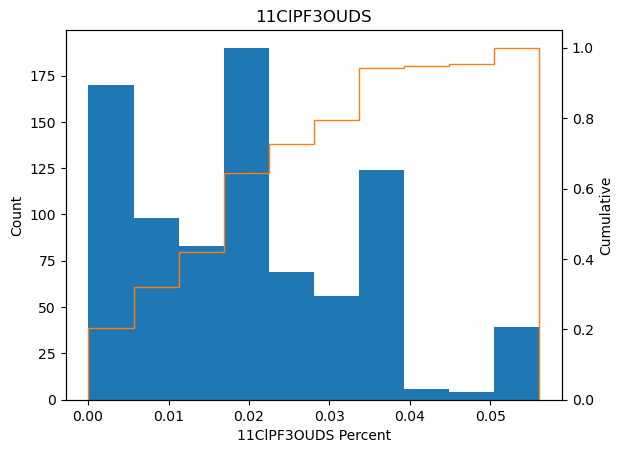

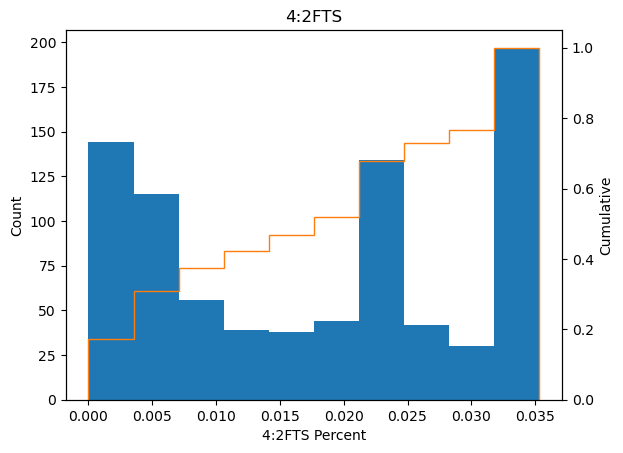

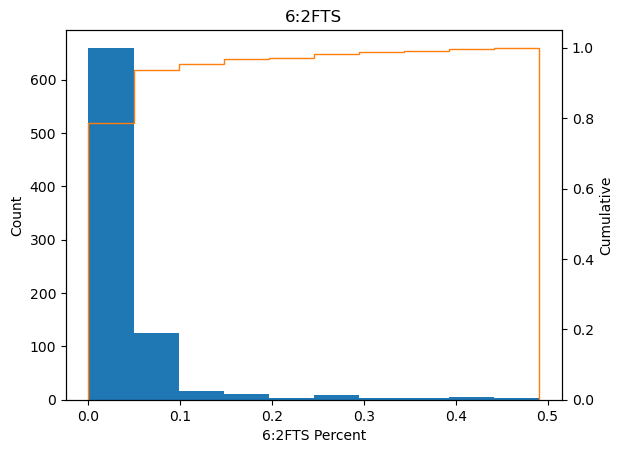

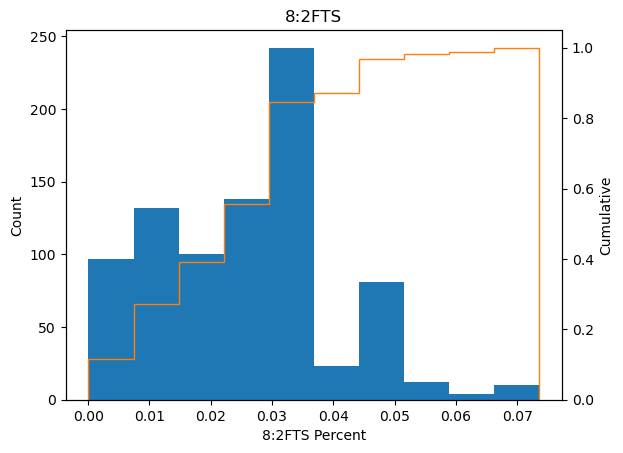

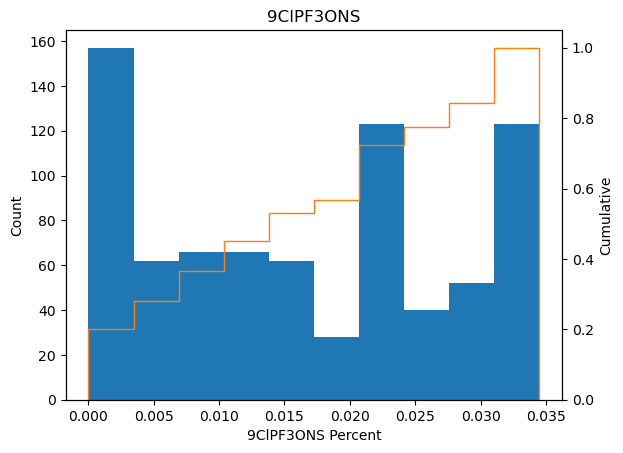

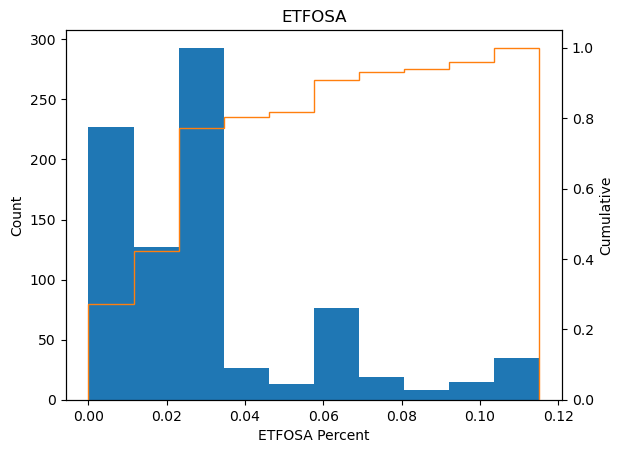

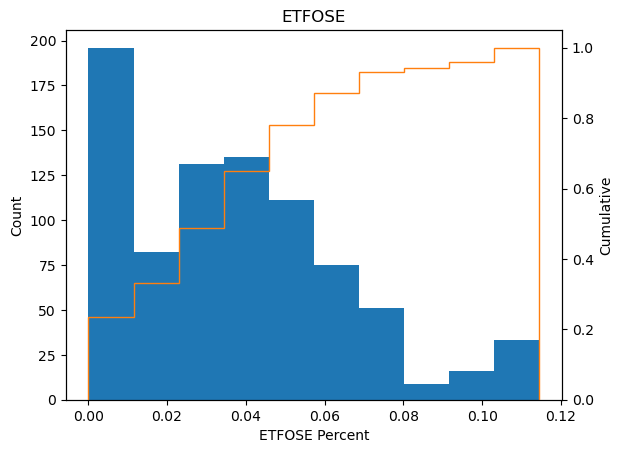

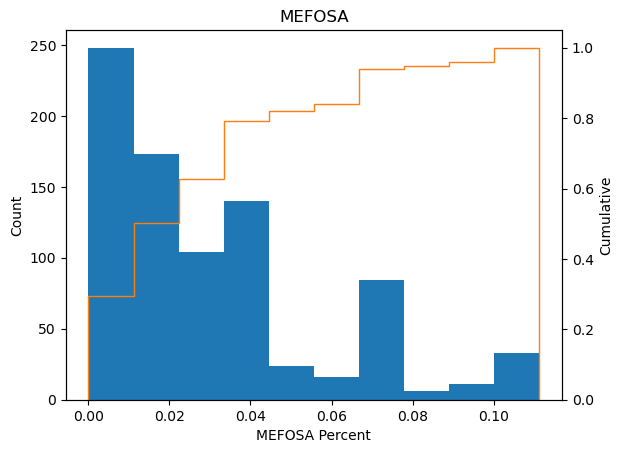

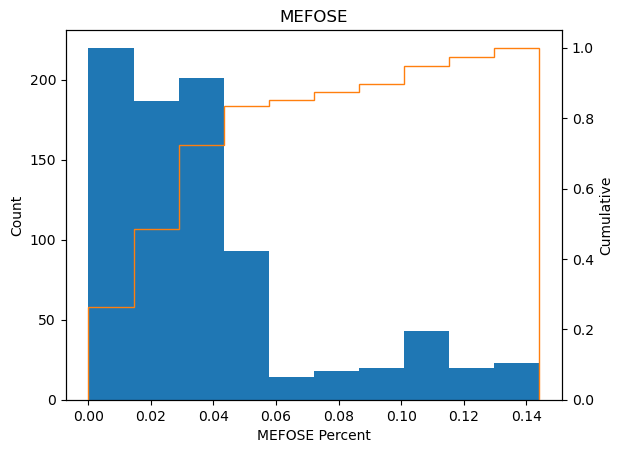

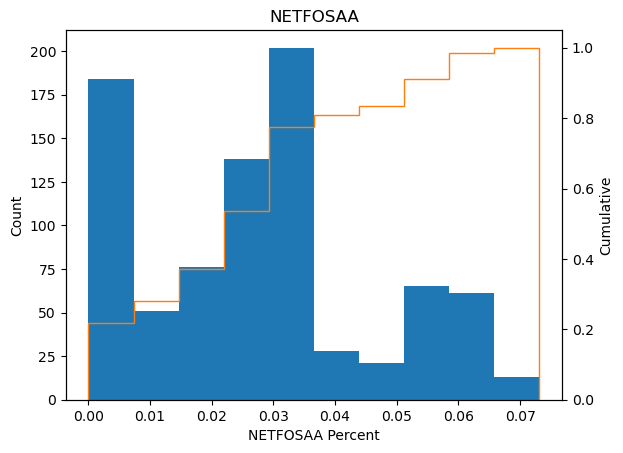

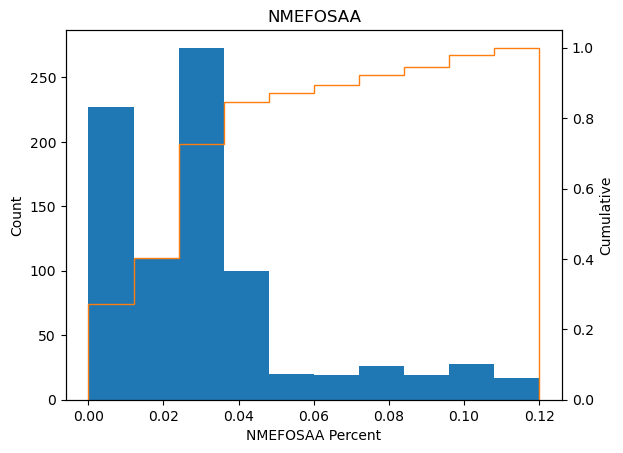

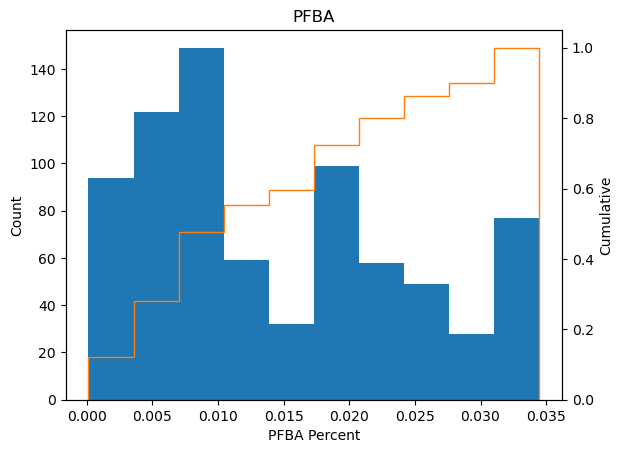

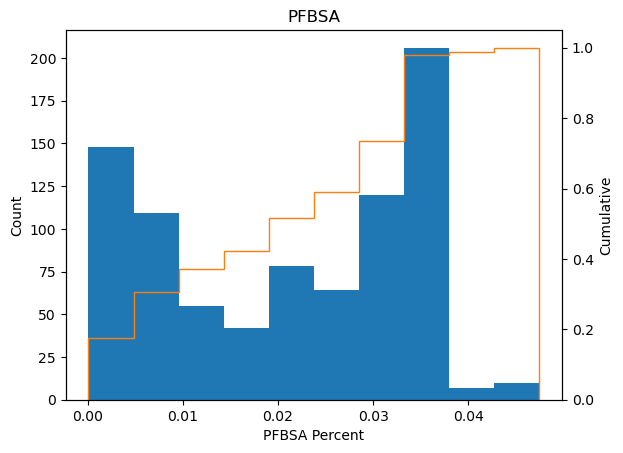

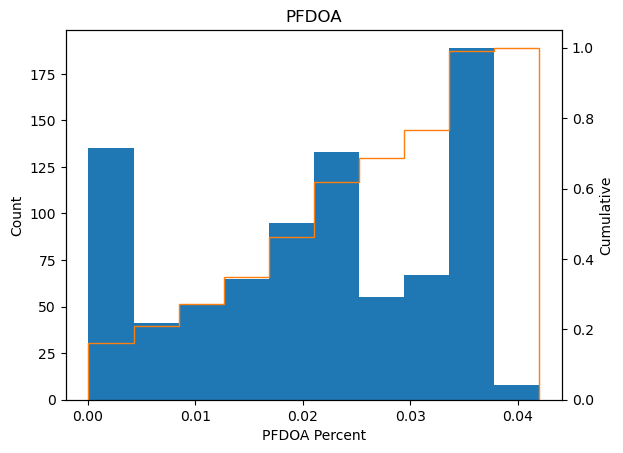

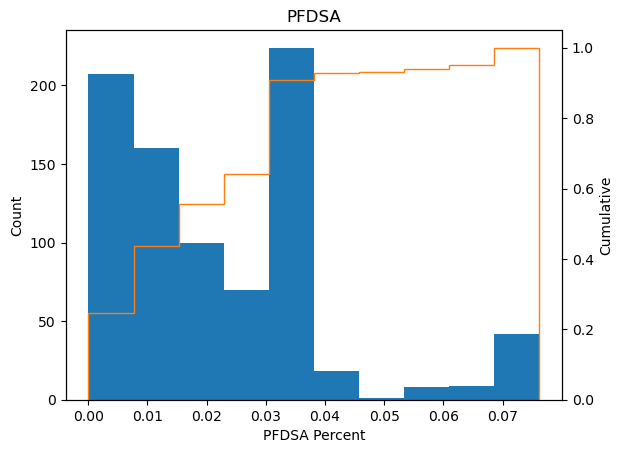

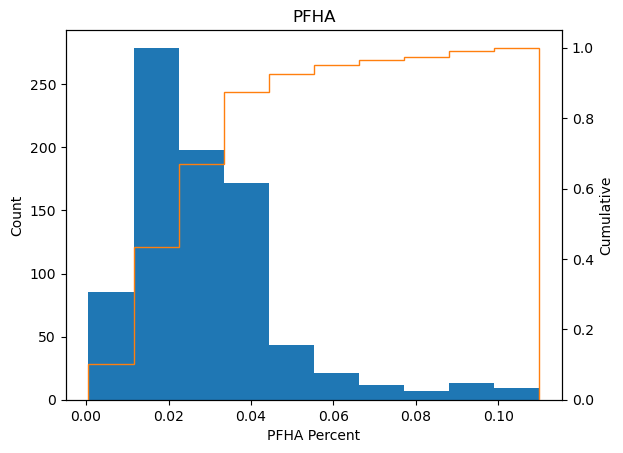

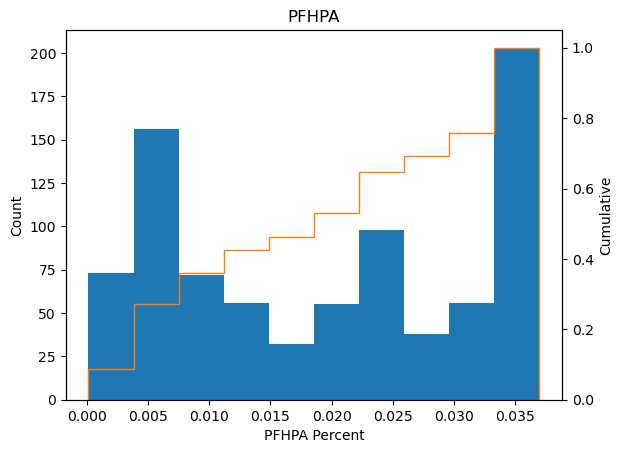

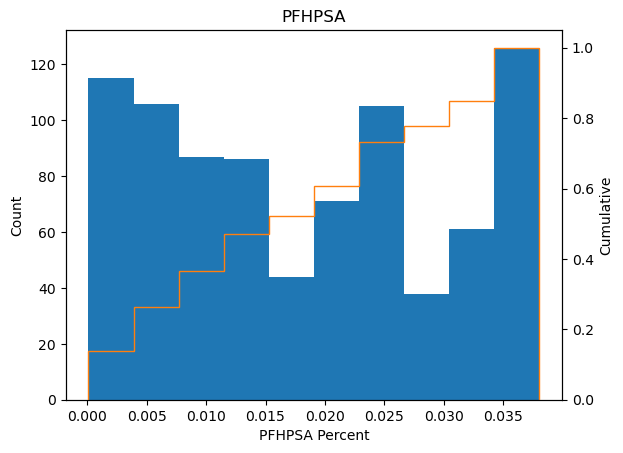

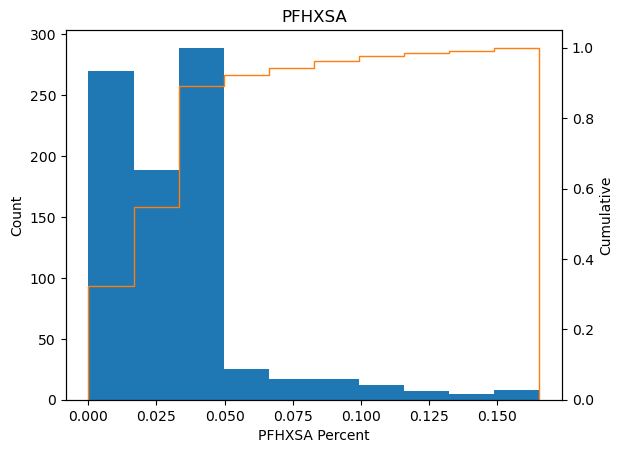

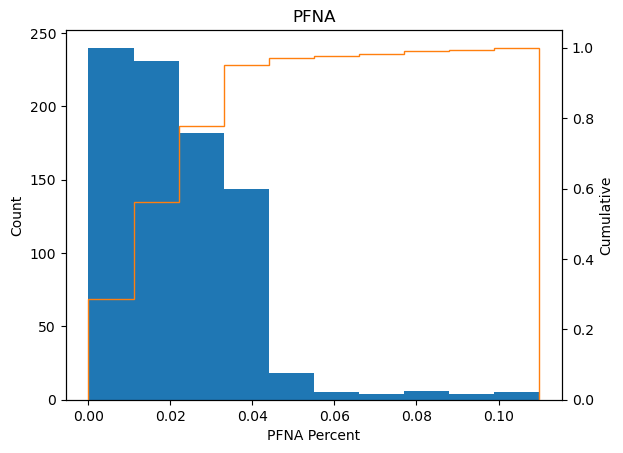

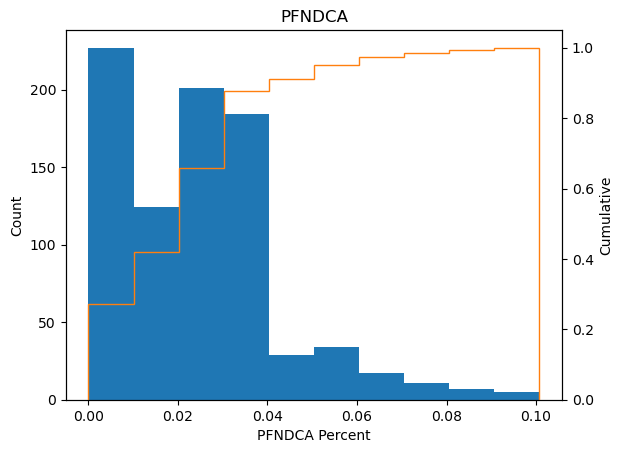

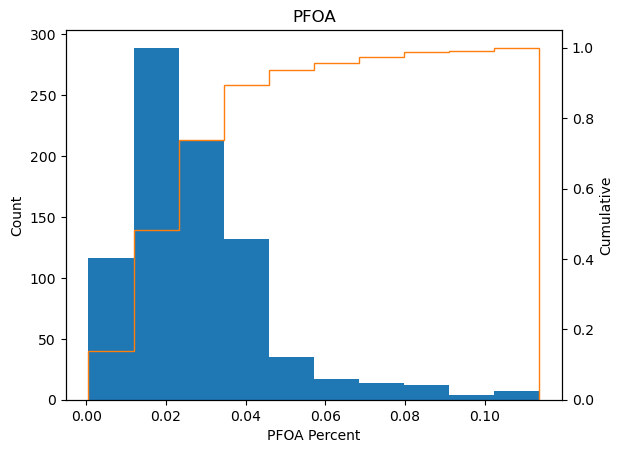

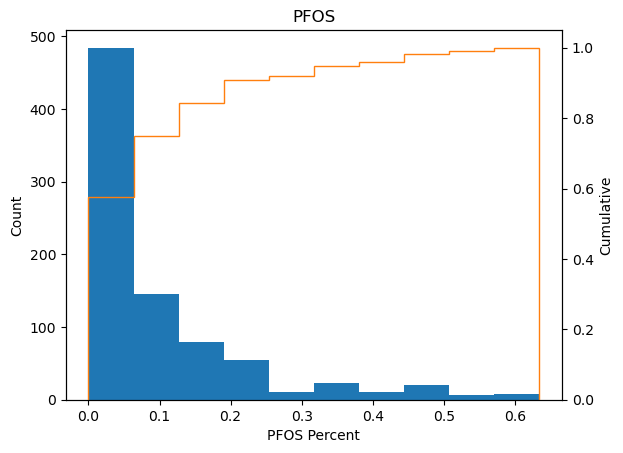

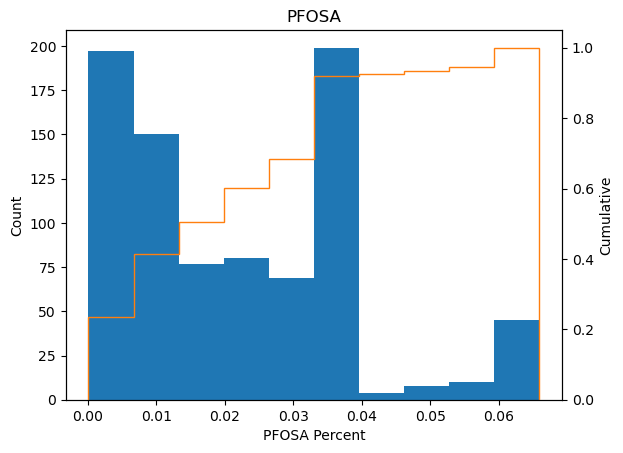

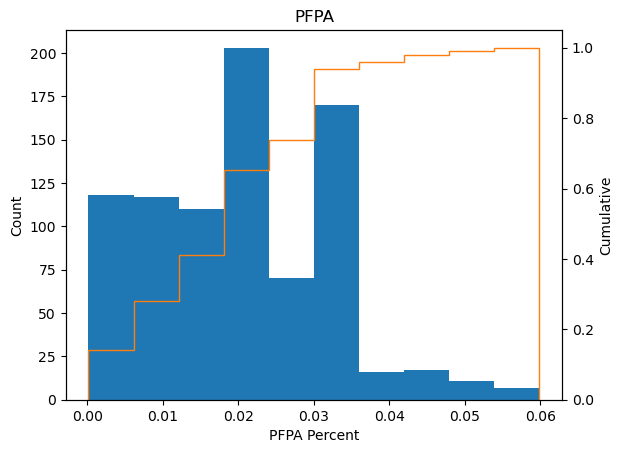

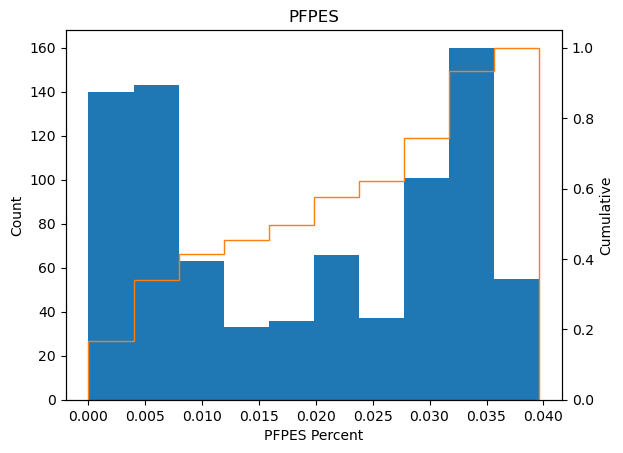

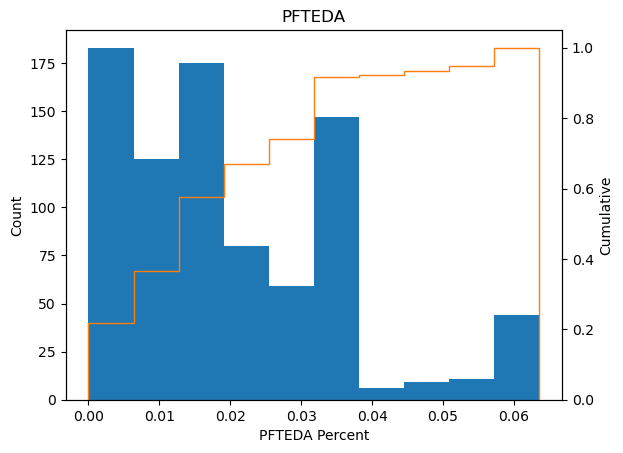

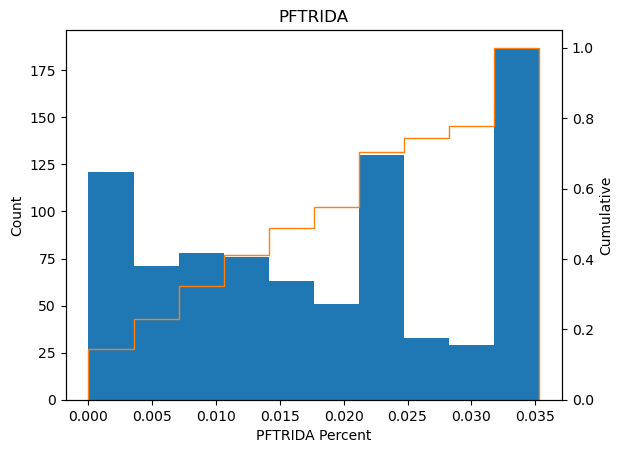

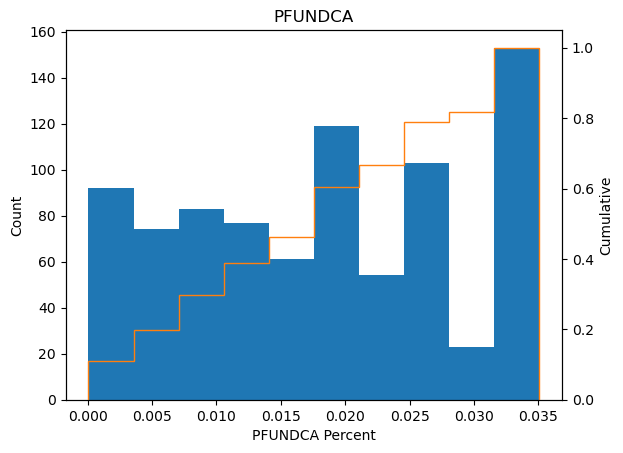

In [8]:
def pretty_graph(df, analyte):
    """takes a data frame and the name of a column contaning numeric values. Makes a nice looking cumulitive histogram"""
    # get rid of outliers
    data = df[analyte][df[analyte] < df[analyte].quantile(.95)]
        
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    ax.set_title(analyte)
    ax.set_xlabel('%s Percent' % analyte)
    ax.set_ylabel('Count')
    ax2.set_ylabel('Cumulative')
    n, bins, patches = ax.hist(data)
    n, bins, patches = ax2.hist(
        data, cumulative=1, histtype='step', color='tab:orange', density=True)
for analyte in dfp_clean.columns[len(idx_columns):]:
    pretty_graph(dfp_clean, analyte)

In [9]:
corr = dfp_clean[dfp_clean.columns[len(idx_columns):]].corr()
corr.style.background_gradient(cmap='coolwarm')

,11ClPF3OUDS,4:2FTS,6:2FTS,8:2FTS,9ClPF3ONS,ETFOSA,ETFOSE,MEFOSA,MEFOSE,NETFOSAA,NMEFOSAA,PFBA,PFBSA,PFDOA,PFDSA,PFHA,PFHPA,PFHPSA,PFHXSA,PFNA,PFNDCA,PFOA,PFOS,PFOSA,PFPA,PFPES,PFTEDA,PFTRIDA,PFUNDCA
11ClPF3OUDS,1.000000,0.683474,-0.279599,-0.052119,0.774319,0.324710,0.233527,0.369341,0.151814,0.097242,0.004412,0.354080,0.006832,0.446063,0.398125,-0.088511,0.262834,0.801240,-0.074216,-0.101825,0.069467,-0.131739,-0.394939,0.363531,0.073503,0.451663,0.298989,0.252991,0.091414
4:2FTS,0.683474,1.000000,-0.276747,-0.026476,0.671298,0.072114,0.089068,0.105721,0.085739,0.262237,0.101385,0.507147,0.033174,0.496357,0.475320,-0.091518,0.368107,0.741856,-0.065633,-0.125093,0.084541,-0.129265,-0.381533,0.508285,0.113786,0.561967,0.420653,0.258344,0.130134
6:2FTS,-0.279599,-0.276747,1.000000,0.003349,-0.276396,-0.263490,-0.297454,-0.251779,-0.251586,-0.244945,-0.253480,-0.185905,-0.129202,-0.301758,-0.239482,0.072833,-0.035323,-0.335007,-0.142706,-0.047218,-0.228274,-0.085628,-0.159738,-0.240685,-0.018653,-0.289258,-0.154024,-0.123348,-0.138808
8:2FTS,-0.052119,-0.026476,0.003349,1.000000,-0.085119,-0.140004,-0.168422,-0.123623,-0.144731,-0.101712,-0.144363,-0.070438,-0.075430,-0.061713,-0.084733,-0.103213,-0.077052,-0.080273,-0.089131,-0.056380,-0.087669,-0.093043,0.002671,-0.070570,-0.071779,-0.080454,-0.050296,0.037351,0.074852
9ClPF3ONS,0.774319,0.671298,-0.276396,-0.085119,1.000000,0.124203,0.226861,0.123798,0.056718,0.230577,0.077879,0.375204,0.042219,0.381968,0.649451,-0.109052,0.371985,0.699470,-0.067603,-0.155440,0.118283,-0.123487,-0.390253,0.541306,0.072576,0.601149,0.626057,0.201505,0.091271
ETFOSA,0.324710,0.072114,-0.263490,-0.140004,0.124203,1.000000,0.854915,0.980556,0.630076,0.050216,0.183074,-0.017951,-0.064741,0.221611,0.028347,-0.113951,-0.122565,0.246676,-0.234578,-0.162339,0.199381,-0.163428,-0.304922,0.010153,-0.108947,-0.005213,-0.016746,0.055226,-0.085500
ETFOSE,0.233527,0.089068,-0.297454,-0.168422,0.226861,0.854915,1.000000,0.812927,0.698485,0.335416,0.327666,-0.040542,-0.011752,0.215069,0.315452,-0.148660,-0.074598,0.187320,-0.286663,-0.223470,0.203949,-0.201688,-0.360269,0.237814,-0.134261,0.093178,0.240228,0.021730,-0.113214
MEFOSA,0.369341,0.105721,-0.251779,-0.123623,0.123798,0.980556,0.812927,1.000000,0.598691,0.010997,0.128479,0.000198,-0.067099,0.203375,-0.007908,-0.115318,-0.112229,0.283163,-0.214849,-0.143681,0.155737,-0.158153,-0.301059,-0.013263,-0.092236,0.002268,-0.053476,0.073394,-0.071114
MEFOSE,0.151814,0.085739,-0.251586,-0.144731,0.056718,0.630076,0.698485,0.598691,1.000000,0.299646,0.501393,0.034109,0.059517,0.213106,-0.057088,-0.071240,-0.291914,-0.036238,-0.285741,-0.179458,0.200972,-0.174023,-0.251480,-0.149118,-0.170453,-0.145454,-0.105940,-0.040744,-0.111886
NETFOSAA,0.097242,0.262237,-0.244945,-0.101712,0.230577,0.050216,0.335416,0.010997,0.299646,1.000000,0.663802,0.050773,0.073052,0.293078,0.352206,-0.088356,-0.011762,0.084583,-0.210660,-0.173707,0.243120,-0.122562,-0.246616,0.300681,-0.080467,0.135939,0.293511,-0.023338,-0.053205


In [11]:
dfp_clean = dfp_clean.drop(columns = ['Units'])
dfp_clean.to_excel('cleaned_data.xlsx', index = False)

In [ ]:
dfp_clean